Q4 test!!!

初始采样取点

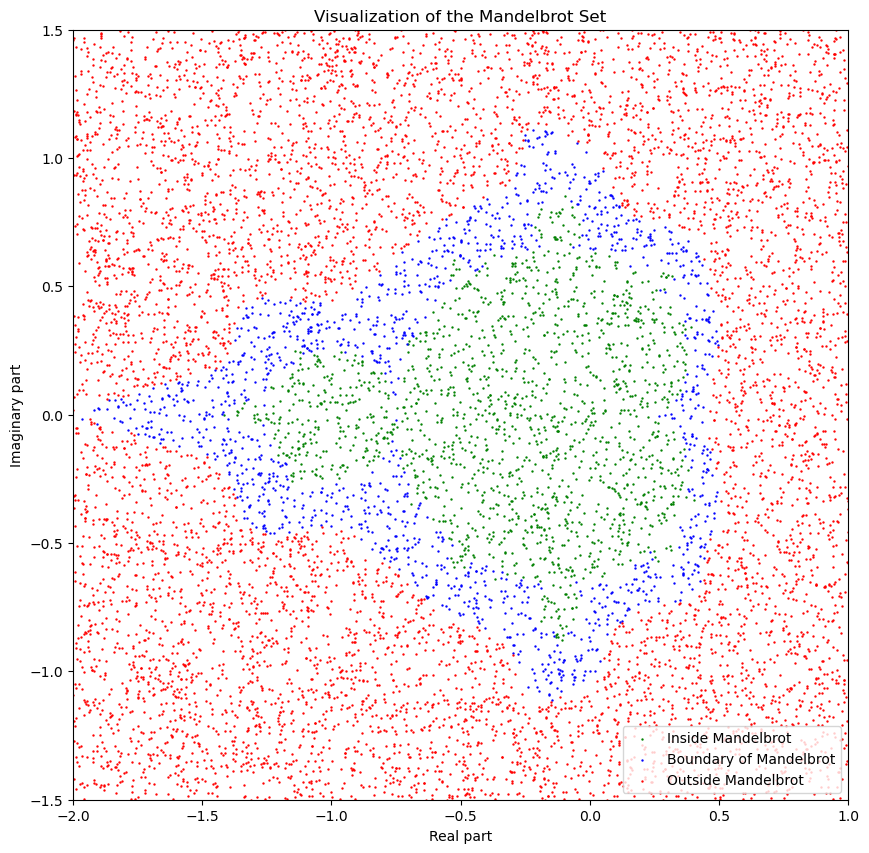

In [67]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(c, max_iter):
    z = 0
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

def random_sampling(x_range, y_range, num_samples):
    real = np.random.uniform(x_range[0], x_range[1], num_samples)
    imag = np.random.uniform(y_range[0], y_range[1], num_samples)
    return real + imag * 1j

def initial_sampling(x_range, y_range, num_samples, max_iter):
    points = random_sampling(x_range, y_range, num_samples)
    stabilities = [mandelbrot(c, max_iter) for c in points]
    inside_mandelbrot = [points[i] for i, stability in enumerate(stabilities) if  stability == max_iter]
    boundary_points = [points[i] for i, stability in enumerate(stabilities) if 5 < stability < max_iter]
    outside_mandelbrot = [points[i] for i, stability in enumerate(stabilities) if stability <= 5]
    return np.array(inside_mandelbrot),np.array(boundary_points),np.array(outside_mandelbrot)

x_range = [-2, 1]
y_range = [-1.5, 1.5]
num_samples = 10000
max_iter = 2000

#Acquired boundary point
inside_mandelbrot, boundary_points , outside_mandelbrot= initial_sampling(x_range, y_range, num_samples, max_iter)

plt.figure(figsize=(10, 10))

# Plot each set of points with different colors
plt.scatter(inside_mandelbrot.real, inside_mandelbrot.imag, color='green', s=0.5, label='Inside Mandelbrot')
plt.scatter(boundary_points.real, boundary_points.imag, color='blue', s=0.5, label='Boundary of Mandelbrot')
plt.scatter(outside_mandelbrot.real, outside_mandelbrot.imag, color='red', s=0.5, label='Outside Mandelbrot')

plt.xlim(x_range)
plt.ylim(y_range)
plt.title('Visualization of the Mandelbrot Set')
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.legend()
plt.show()


区域可视化

In [80]:
# Given an array of boundary points, and the size of the side length of the boundary region
def define_regions(points, side_length):
    squares = []
    half_side = side_length / 2

    for point in points:
        left = max(point.real - half_side, x_range[0])
        right = min(point.real + half_side, x_range[1])
        bottom = max(point.imag - half_side, y_range[0])
        top = min(point.imag + half_side, y_range[1])

        # 仅当方形在定义的范围内时才添加
        if left < right and bottom < top:
            squares.append([left, right, bottom, top])

    return squares


init_area_of_sample = (x_range[1] - x_range[0]) * (y_range[1] - y_range[0])
side_length = init_area_of_sample * 0.01
# Use examples
inside_mandelbrot, boundary_points , outside_mandelbrot = initial_sampling(x_range, y_range, num_samples, max_iter)

inside_mandelbrot_squares = define_regions(inside_mandelbrot, side_length)
boundary_squares = define_regions(boundary_points, side_length)  # 0.1 is the length of the side of the square area
outside_mandelbrot_squares = define_regions(outside_mandelbrot, side_length)



import matplotlib.pyplot as plt

def visualize_regions(ax, squares, color, title):
    # Draw each square
    for square in squares:
        left, right, bottom, top = square
        square_patch = plt.Rectangle((left, bottom), right - left, top - bottom, 
                                     edgecolor=color, facecolor='none')
        ax.add_patch(square_patch)

    ax.set_xlim(x_range)
    ax.set_ylim(y_range)
    ax.set_xlabel('Real part')
    ax.set_ylabel('Imaginary part')
    ax.set_title(title)


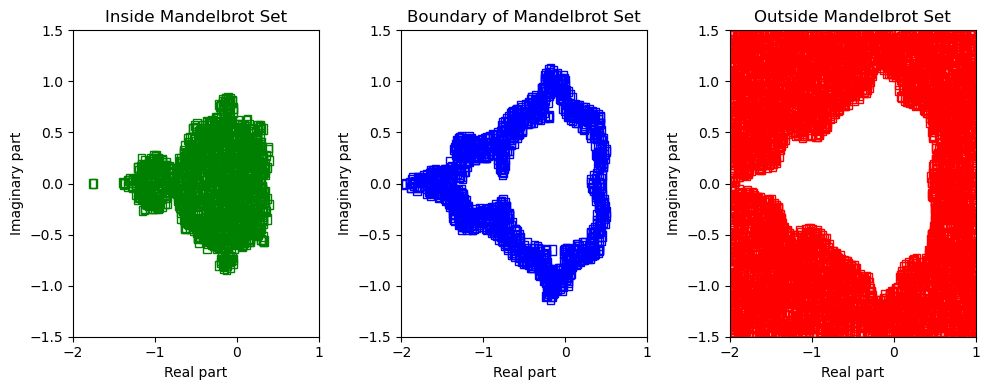

In [84]:
# Create a 3x1 grid of plots
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

# Visualize each set of regions in separate subplots
visualize_regions(axs[0], inside_mandelbrot_squares, 'green', 'Inside Mandelbrot Set')
visualize_regions(axs[1], boundary_squares, 'blue', 'Boundary of Mandelbrot Set')
visualize_regions(axs[2], outside_mandelbrot_squares, 'red', 'Outside Mandelbrot Set')

plt.tight_layout()
plt.show()

合并三个区域

In [72]:
from shapely.geometry import Polygon
from shapely.geometry import box, Polygon, MultiPolygon
from shapely.ops import unary_union

x_range = [-2, 1]
y_range = [-1.5, 1.5]

# 创建一个矩形多边形
rectangle = box(x_range[0], y_range[0], x_range[1], y_range[1])

# 将矩形多边形包装在一个 MultiPolygon 中
init_space = MultiPolygon([rectangle])

def merge_squares(squares, current_sample_space=init_space):
    polygons = [Polygon([(left, bottom), (right, bottom), (right, top), (left, top)]) for left, right, bottom, top in squares]
    merged_area = unary_union(polygons)

    # 使用intersection方法获取合并区域与current_sample_space的交集
    intersection = merged_area.intersection(current_sample_space)

    if isinstance(intersection, MultiPolygon):
        return intersection
    elif isinstance(intersection, Polygon):
        return MultiPolygon([intersection])
    else:
        return MultiPolygon([])  # 返回空的MultiPolygon对象
    
# 计算每个集合
inside_space = merge_squares(inside_mandelbrot_squares, init_space)
boundary_space = merge_squares(boundary_squares, init_space)
outside_space = merge_squares(outside_mandelbrot_squares, init_space)

print(f"Inside Mandelbrot Set Merged Area: {inside_space.area}")
print(f"Boundary of Mandelbrot Set Merged Area: {boundary_space.area}")
print(f"Outside Mandelbrot Set Merged Area: {outside_space.area}")

print(inside_space)
print(inside_space.area + boundary_space.area + outside_space.area)


Inside Mandelbrot Set Merged Area: 1.794795251044669
Boundary of Mandelbrot Set Merged Area: 1.8451853803039444
Outside Mandelbrot Set Merged Area: 6.465092115872032
MULTIPOLYGON (((-1.2066503771234631 -0.2166541084215124, -1.2066503771234631 -0.2026829480995578, -1.2082570540097228 -0.2026829480995578, -1.2082570540097228 -0.1988545853087809, -1.24644377862645 -0.1988545853087809, -1.24644377862645 -0.1639259460187082, -1.2628353776530261 -0.1639259460187082, -1.2628353776530261 -0.0747149399290513, -1.2651440258176883 -0.0747149399290513, -1.2651440258176883 -0.1003008244097906, -1.3551440258176881 -0.1003008244097906, -1.3551440258176881 -0.0999519340584523, -1.3901106766099414 -0.0999519340584523, -1.3901106766099414 -0.0401376202293472, -1.4008232295198646 -0.0401376202293472, -1.4008232295198646 -0.0385354281023945, -1.4346280769582236 -0.0385354281023945, -1.4346280769582236 0.0514645718976055, -1.4171192054971486 0.0514645718976055, -1.4171192054971486 0.0522932346073049, -1.39

Process the overlapping parts and supplement the unsampled parts

In [73]:
def adjust_spaces(inside_space, boundary_space, outside_space, init_space):
    # Step 1: Add intersection with boundary_space to boundary_space
    boundary_inside_intersection = boundary_space.intersection(inside_space)
    boundary_outside_intersection = boundary_space.intersection(outside_space)
    boundary_space = boundary_space.union(boundary_inside_intersection).union(boundary_outside_intersection)

    # Step 2: Remove intersection with boundary_space from inside_space and outside_space
    inside_space = inside_space.difference(boundary_inside_intersection)
    outside_space = outside_space.difference(boundary_outside_intersection)

    # Step 3: Add intersection between inside_space and outside_space to boundary_space
    inside_outside_intersection = inside_space.intersection(outside_space)
    boundary_space = boundary_space.union(inside_outside_intersection)

    # Remove intersections from inside_space and outside_space
    inside_space = inside_space.difference(inside_outside_intersection)
    outside_space = outside_space.difference(inside_outside_intersection)

    # Step 4: Calculate the difference between the union of all spaces and init_space
    union_of_spaces = inside_space.union(boundary_space).union(outside_space)
    difference = init_space.difference(union_of_spaces)
    #difference = union_of_spaces.difference(init_space)
    # Step 5: Add the difference to boundary_space
    boundary_space = boundary_space.union(difference)
    
    return inside_space, boundary_space, outside_space

# Adjust the spaces according to the rules
adjusted_inside_space, adjusted_boundary_space, adjusted_outside_space = adjust_spaces(inside_space, boundary_space, outside_space, init_space)

# Calculate the area of adjusted spaces
adjusted_inside_area = adjusted_inside_space.area
adjusted_boundary_area = adjusted_boundary_space.area
adjusted_outside_area = adjusted_outside_space.area

print(f"Adjusted Inside Mandelbrot Set Area: {adjusted_inside_area}")
print(f"Adjusted Boundary of Mandelbrot Set Area: {adjusted_boundary_area}")
print(f"Adjusted Outside Mandelbrot Set Area: {adjusted_outside_area}")

print(adjusted_inside_space)
print(adjusted_outside_space)
print(adjusted_inside_space.area+adjusted_boundary_space.area+adjusted_outside_space.area)


Adjusted Inside Mandelbrot Set Area: 1.2402467068076344
Adjusted Boundary of Mandelbrot Set Area: 1.850486954515347
Adjusted Outside Mandelbrot Set Area: 5.9092663386770266
MULTIPOLYGON (((-0.549341483845842 0.4367353081382385, -0.5328785278730469 0.4367353081382385, -0.5328785278730469 0.4409608018401862, -0.5017982170285754 0.4409608018401862, -0.5017982170285754 0.4581863173768336, -0.4972237757705202 0.4581863173768336, -0.4972237757705202 0.4830215868480278, -0.4829517214199858 0.4830215868480278, -0.4829517214199858 0.5251551825504838, -0.3976027406318178 0.5251551825504838, -0.3976027406318178 0.5463067456261043, -0.3462712935439102 0.5463067456261043, -0.3462712935439102 0.5628520195446559, -0.2998660431377695 0.5628520195446559, -0.2998660431377695 0.5977462062405862, -0.2614329819454841 0.5977462062405862, -0.2614329819454841 0.6069734426342944, -0.2071507015095086 0.6069734426342944, -0.2071507015095086 0.6106750709066405, -0.1934689228954353 0.6106750709066405, -0.193468922

可视化第一次迭代后的结果

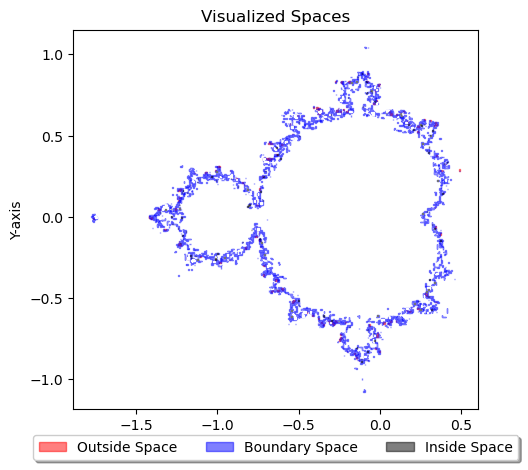

In [91]:
from shapely.geometry import Polygon, MultiPolygon
import matplotlib.pyplot as plt

# 更新的可视化函数，允许指定颜色
def visualize_space(merged_rectangles, ax, color='blue', label=''):
    # 如果是单个 Polygon，将其放入一个列表中
    if isinstance(merged_rectangles, Polygon):
        merged_rectangles = [merged_rectangles]
    # 如果是 MultiPolygon，提取每个 Polygon
    elif isinstance(merged_rectangles, MultiPolygon):
        merged_rectangles = [polygon for polygon in merged_rectangles.geoms]

    # 绘制并填充每个多边形
    for polygon in merged_rectangles:
        x, y = polygon.exterior.xy
        ax.fill(x, y, color=color, alpha=0.5)  # 填充外部多边形
          # 绘制内部多边形（空洞）
        for interior in polygon.interiors:
            x, y = interior.xy
            ax.fill(x, y, color='white', alpha=1)  # 使用白色填充内部多边形以创建空洞效果
    ax.fill([], [], color=color, alpha=0.5, label=label)

# Create a new plot
fig, ax = plt.subplots()

# Visualize three areas with labels for the legend
visualize_space(adjusted_outside_space, ax, color='red', label='Outside Space')    # Outer space in red
visualize_space(adjusted_boundary_space, ax, color='blue', label='Boundary Space')  # Boundary space in blue
visualize_space(adjusted_inside_space, ax, color='black', label='Inside Space')     # Inner space in black

# Set the x and y boundaries of the image
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Visualized Spaces')
plt.gca().set_aspect('equal', adjustable='box')

# Add the legend to the plot
# Place the legend outside the plot area
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=3)

# Adjust the layout to make room for the legend
plt.tight_layout()

# Display the plot
plt.show()

进行下一步计算

点采样

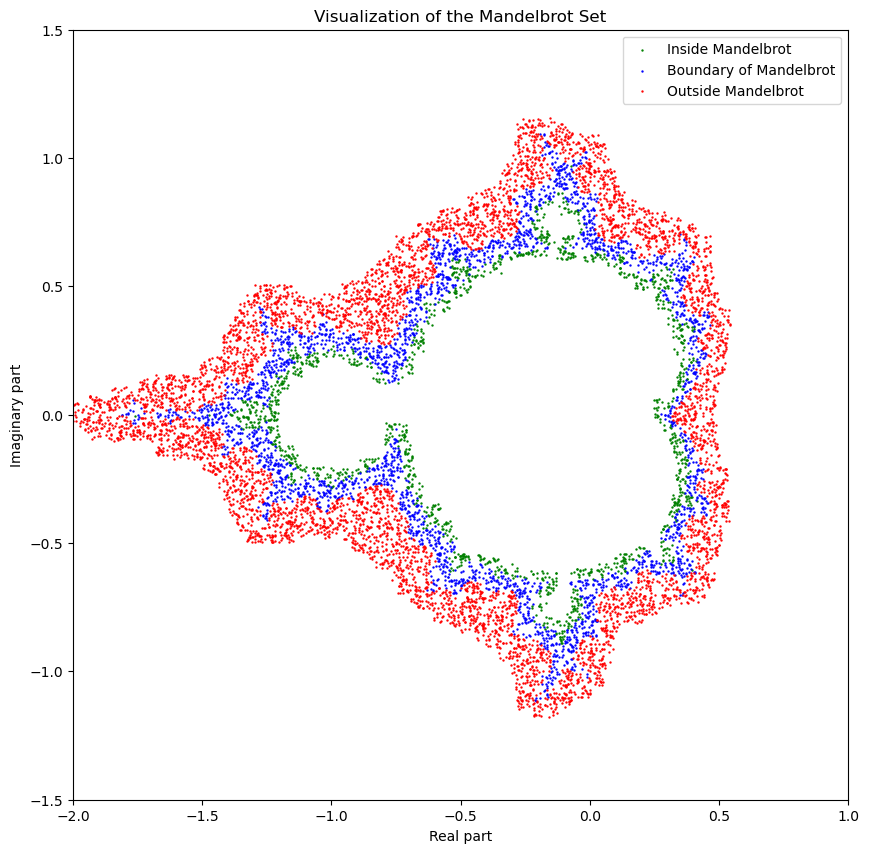

In [154]:
import numpy as np
from shapely.geometry import Point


def random_sampling_within_multipolygon(multipolygon, num_samples):
    """在给定的 MultiPolygon 范围内随机生成点"""
    minx, miny, maxx, maxy = multipolygon.bounds
    points = []
    while len(points) < num_samples:
        real = np.random.uniform(minx, maxx)
        imag = np.random.uniform(miny, maxy)
        point = Point(real, imag)  # 创建一个 Point 对象
        if multipolygon.contains(point):
            complex_point = real + imag * 1j  # 创建一个复数
            points.append(complex_point)
    return points


def random_sampling(multipolygon, num_samples, max_iter, iteration_threshold):
    points = random_sampling_within_multipolygon(multipolygon, num_samples)
    stabilities = [mandelbrot(c, max_iter) for c in points]
    inside_mandelbrot = [points[i] for i, stability in enumerate(stabilities) if stability == max_iter]
    boundary_points = [points[i] for i, stability in enumerate(stabilities) if iteration_threshold < stability < max_iter]
    outside_mandelbrot = [points[i] for i, stability in enumerate(stabilities) if stability <= iteration_threshold]
    return np.array(inside_mandelbrot), np.array(boundary_points), np.array(outside_mandelbrot)

num_samples = 10000
max_iter = 2000
iteration_threshold = 10
current_sample_space = adjusted_boundary_space
# 进行采样
inside_mandelbrot, boundary_points , outside_mandelbrot= random_sampling(adjusted_boundary_space, num_samples, max_iter, iteration_threshold)

plt.figure(figsize=(10, 10))

# Plot each set of points with different colors
plt.scatter(inside_mandelbrot.real, inside_mandelbrot.imag, color='green', s=0.5, label='Inside Mandelbrot')
plt.scatter(boundary_points.real, boundary_points.imag, color='blue', s=0.5, label='Boundary of Mandelbrot')
plt.scatter(outside_mandelbrot.real, outside_mandelbrot.imag, color='red', s=0.5, label='Outside Mandelbrot')

plt.xlim(x_range)
plt.ylim(y_range)
plt.title('Visualization of the Mandelbrot Set')
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.legend()
plt.show()



区域可视化

0.13665323380698594


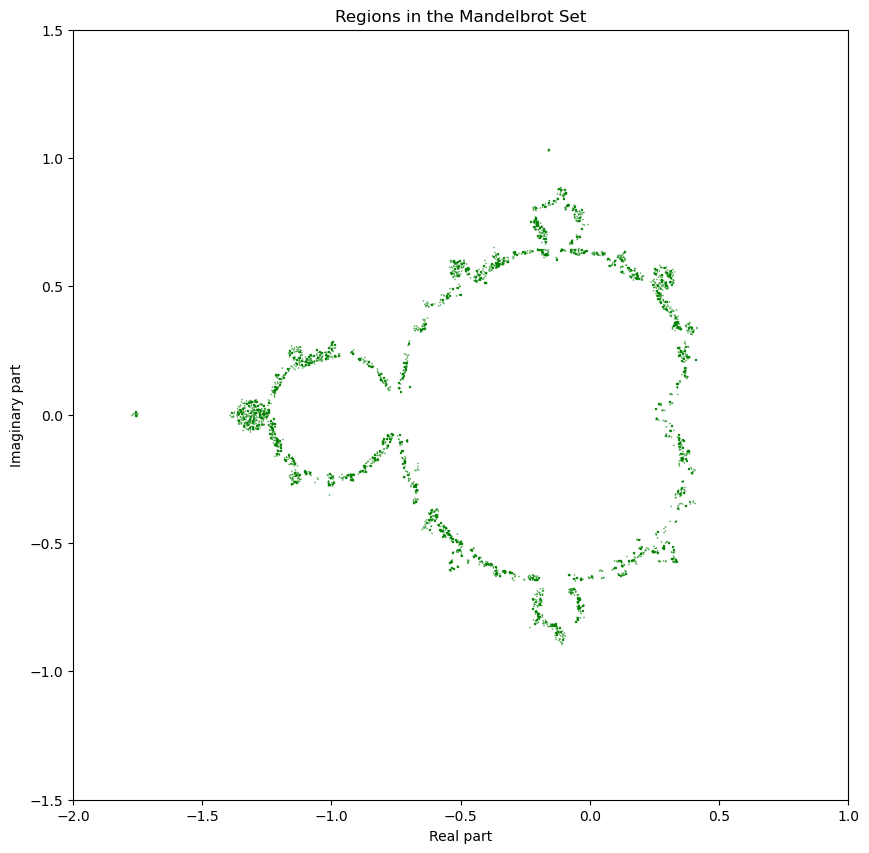

KeyboardInterrupt: 

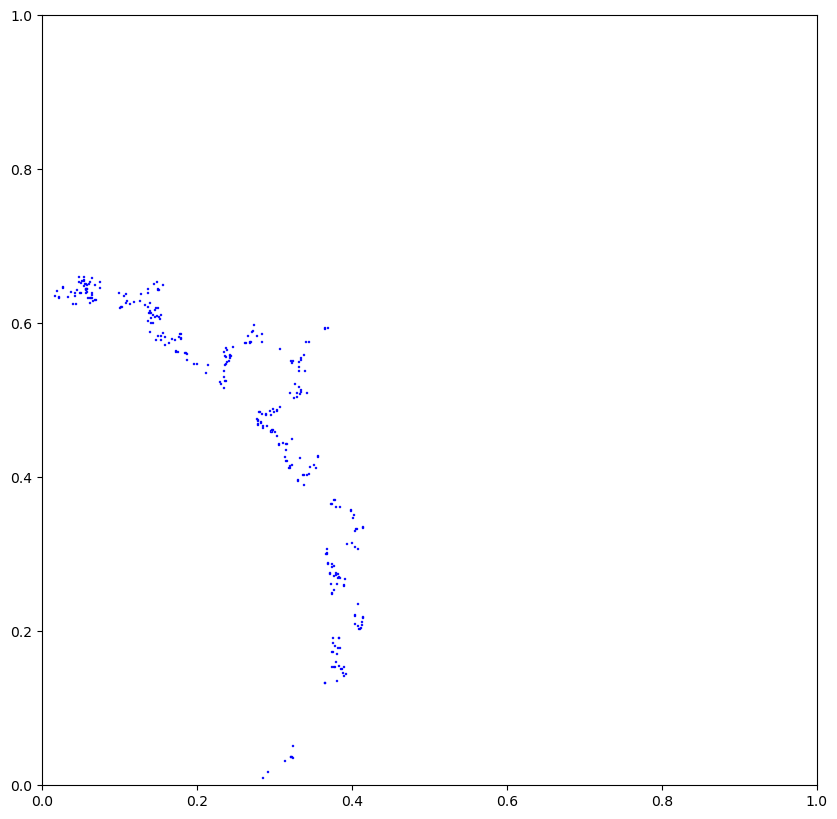

In [125]:
# Given an array of boundary points, and the size of the side length of the boundary region
def define_regions(points, side_length):
    squares = []
    half_side = side_length / 2

    for point in points:
        left = max(point.real - half_side, x_range[0])
        right = min(point.real + half_side, x_range[1])
        bottom = max(point.imag - half_side, y_range[0])
        top = min(point.imag + half_side, y_range[1])

        # 仅当方形在定义的范围内时才添加
        if left < right and bottom < top:
            squares.append([left, right, bottom, top])

    return squares

num_samples = 20000
init_area_of_sample = current_sample_space.area
print(current_sample_space.area)
side_length = init_area_of_sample * 0.01
# Use examples
inside_mandelbrot, boundary_points , outside_mandelbrot= random_sampling(adjusted_boundary_space, num_samples, max_iter, iteration_threshold)

inside_mandelbrot_squares = define_regions(inside_mandelbrot, side_length)
boundary_squares = define_regions(boundary_points, side_length)  # 0.1 is the length of the side of the square area
outside_mandelbrot_squares = define_regions(outside_mandelbrot, side_length)



# Visualize the area of squares
def visualize_regions(squares, color):
    fig, ax = plt.subplots(figsize=(10, 10))

    # Draw each square
    for square in squares:
        left, right, bottom, top = square
        square_patch = plt.Rectangle((left, bottom), right - left, top - bottom, 
                                     edgecolor=color, facecolor='none')
        ax.add_patch(square_patch)

    ax.set_xlim(x_range)
    ax.set_ylim(y_range)
    plt.xlabel('Real part')
    plt.ylabel('Imaginary part')
    plt.title('Regions in the Mandelbrot Set')
    plt.show()

# Visualize each set of regions
visualize_regions(inside_mandelbrot_squares, 'green')
visualize_regions(boundary_squares, 'blue')
visualize_regions(outside_mandelbrot_squares, 'red')


合并区域

In [156]:
inside_space = merge_squares(inside_mandelbrot_squares,current_sample_space)
boundary_space = merge_squares(boundary_squares,current_sample_space)
outside_space = merge_squares(outside_mandelbrot_squares,current_sample_space)

print(f"Inside Mandelbrot Set Merged Area: {inside_space.area}")
print(f"Boundary of Mandelbrot Set Merged Area: {boundary_space.area}")
print(f"Outside Mandelbrot Set Merged Area: {outside_space.area}")

print(inside_space.area + boundary_space.area + outside_space.area)

Inside Mandelbrot Set Merged Area: 0.3117897787338945
Boundary of Mandelbrot Set Merged Area: 0.6029225134868056
Outside Mandelbrot Set Merged Area: 1.0792230209146447
1.9939353131353448


处理重合

In [157]:
# Adjust the spaces according to the rules
adjusted_inside_space, adjusted_boundary_space, adjusted_outside_space = adjust_spaces(inside_space, boundary_space, outside_space,current_sample_space)

# Calculate the area of adjusted spaces
adjusted_inside_area = adjusted_inside_space.area
adjusted_boundary_area = adjusted_boundary_space.area
adjusted_outside_area = adjusted_outside_space.area

print(f"Adjusted Inside Mandelbrot Set Area: {adjusted_inside_area}")
print(f"Adjusted Boundary of Mandelbrot Set Area: {adjusted_boundary_area}")
print(f"Adjusted Outside Mandelbrot Set Area: {adjusted_outside_area}")

print(adjusted_inside_space.area+adjusted_boundary_space.area+adjusted_outside_space.area)

Adjusted Inside Mandelbrot Set Area: 0.2133528664722604
Adjusted Boundary of Mandelbrot Set Area: 0.6029299018518937
Adjusted Outside Mandelbrot Set Area: 0.9717767954552782
1.788059563779432


可视化

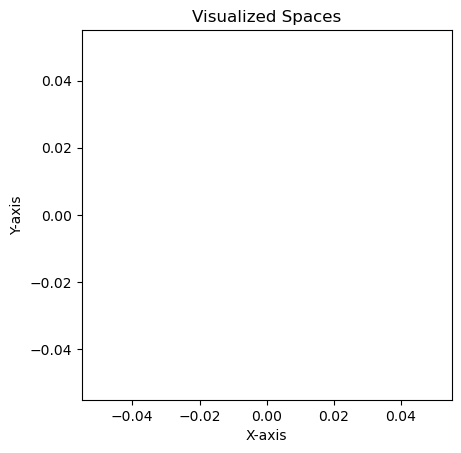

In [29]:
from shapely.geometry import Polygon, MultiPolygon
import matplotlib.pyplot as plt

# 更新的可视化函数，允许指定颜色
def visualize_space(merged_rectangles, ax, color='blue', hole_color='white'):
    # 如果是单个 Polygon，将其放入一个列表中
    if isinstance(merged_rectangles, Polygon):
        merged_rectangles = [merged_rectangles]
    # 如果是 MultiPolygon，提取每个 Polygon
    elif isinstance(merged_rectangles, MultiPolygon):
        merged_rectangles = [polygon for polygon in merged_rectangles.geoms]

    # 绘制并填充每个多边形
    for polygon in merged_rectangles:
        x, y = polygon.exterior.xy
        ax.fill(x, y, color=color, alpha=0.5)  

# 创建一个新的绘图
fig, ax = plt.subplots()

# 可视化三个区域
visualize_space(adjusted_inside_space, ax, color='green')   # 内部空间为绿色
visualize_space(adjusted_boundary_space, ax, color='blue')  # 边界空间为蓝色
visualize_space(adjusted_outside_space, ax, color='red')    # 外部空间为红色

# 设置图像的x和y边界
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Visualized Spaces')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


Q4 * 综合函数：

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import box, MultiPolygon
from shapely.geometry import Polygon, MultiPolygon
from shapely.geometry import Point
from shapely.ops import unary_union
import time

In [116]:
def mandelbrot(c, max_iter):
    z = 0
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

def init_sample_area(x_range,y_range):
    # 创建一个矩形多边形
    rectangle = box(x_range[0], y_range[0], x_range[1], y_range[1])

    # 将矩形多边形包装在一个 MultiPolygon 中
    multipolygon = MultiPolygon([rectangle])
    return multipolygon



def random_sampling_within_multipolygon(multipolygon, num_samples):
    polygons = [multipolygon] if isinstance(multipolygon, Polygon) else multipolygon.geoms
    #print(len(polygons))
    # 确定每个子多边形的样本数
    total_area = sum(p.area for p in polygons)
    sample_counts = [int(p.area / total_area * num_samples) for p in polygons]

    points = []
    for polygon, num_samples_in_polygon in zip(polygons, sample_counts):
        minx, miny, maxx, maxy = polygon.bounds
        samples_in_current_polygon = 0
        t = 0
        while samples_in_current_polygon < num_samples_in_polygon:
            t += 1
            real = np.random.uniform(minx, maxx)
            imag = np.random.uniform(miny, maxy)
            point = Point(real, imag)
            if polygon.contains(point):
                complex_point = real + imag * 1j
                points.append(complex_point)
                samples_in_current_polygon += 1
        #print(t)
    return points



#定义采样结果
def random_sampling(multipolygon, num_samples, max_iter, iteration_threshold):
    points = random_sampling_within_multipolygon(multipolygon, num_samples)
    stabilities = [mandelbrot(c, max_iter) for c in points]
    inside_mandelbrot = [points[i] for i, stability in enumerate(stabilities) if stability == max_iter]
    boundary_points = [points[i] for i, stability in enumerate(stabilities) if iteration_threshold < stability < max_iter]
    outside_mandelbrot = [points[i] for i, stability in enumerate(stabilities) if stability <= iteration_threshold]
    return np.array(inside_mandelbrot), np.array(boundary_points), np.array(outside_mandelbrot)

#对于采样结果分成小正方形的集合
def define_regions(points, side_length):
    squares = []
    half_side = side_length / 2

    for point in points:
        left = max(point.real - half_side, x_range[0])
        right = min(point.real + half_side, x_range[1])
        bottom = max(point.imag - half_side, y_range[0])
        top = min(point.imag + half_side, y_range[1])

        # 仅当方形在定义的范围内时才添加
        if left < right and bottom < top:
            squares.append([left, right, bottom, top])

    return squares

#将小正方形的集合转为MultiPolygon格式
def merge_squares(squares, current_sample_space):
    polygons = [Polygon([(left, bottom), (right, bottom), (right, top), (left, top)]) for left, right, bottom, top in squares]
    merged_area = unary_union(polygons)

    # 使用intersection方法获取合并区域与current_sample_space的交集
    intersection = merged_area.intersection(current_sample_space)

    if isinstance(intersection, MultiPolygon):
        return intersection
    elif isinstance(intersection, Polygon):
        return MultiPolygon([intersection])
    else:
        return MultiPolygon([])  # 返回空的MultiPolygon对象
    
#处理生成的三个MultiPolygon区域
def adjust_spaces(inside_space, boundary_space, outside_space, init_space):
    # Step 1: Add intersection with boundary_space to boundary_space
    boundary_inside_intersection = boundary_space.intersection(inside_space)
    boundary_outside_intersection = boundary_space.intersection(outside_space)
    boundary_space = boundary_space.union(boundary_inside_intersection).union(boundary_outside_intersection)

    # Step 2: Remove intersection with boundary_space from inside_space and outside_space
    inside_space = inside_space.difference(boundary_inside_intersection)
    outside_space = outside_space.difference(boundary_outside_intersection)

    # Step 3: Add intersection between inside_space and outside_space to boundary_space
    inside_outside_intersection = inside_space.intersection(outside_space)
    boundary_space = boundary_space.union(inside_outside_intersection)

    # Remove intersections from inside_space and outside_space
    inside_space = inside_space.difference(inside_outside_intersection)
    outside_space = outside_space.difference(inside_outside_intersection)

    # Step 4: Calculate the difference between the union of all spaces and init_space
    union_of_spaces = inside_space.union(boundary_space).union(outside_space)
    difference = init_space.difference(union_of_spaces)

    # Step 5: Add the difference to boundary_space
    boundary_space = boundary_space.union(difference)
    return inside_space, boundary_space, outside_space

#进行每轮的可视化绘图
def visualize_space(merged_rectangles, ax, color='blue', label=''):
    # 如果是单个 Polygon，将其放入一个列表中
    if isinstance(merged_rectangles, Polygon):
        merged_rectangles = [merged_rectangles]
    # 如果是 MultiPolygon，提取每个 Polygon
    elif isinstance(merged_rectangles, MultiPolygon):
        merged_rectangles = [polygon for polygon in merged_rectangles.geoms]

    # 绘制并填充每个多边形
    for polygon in merged_rectangles:
        x, y = polygon.exterior.xy
        ax.fill(x, y, color=color, alpha=0.5)  # 填充外部多边形
          # 绘制内部多边形（空洞）
        for interior in polygon.interiors:
            x, y = interior.xy
            ax.fill(x, y, color='white', alpha=1)  # 使用白色填充内部多边形以创建空洞效果
    ax.fill([], [], color=color, alpha=0.5, label=label)
    
def add_area_text(fig, area, label, ypos):
    # Center the text horizontally at the given vertical position
    fig.text(0.5, ypos, f"{label}: {area:.2f}", ha='center', fontsize=9)
    
def final_sampling(multipolygon, num_samples, max_iter, iteration_threshold):
    points = random_sampling_within_multipolygon(multipolygon, num_samples)
    stabilities = [mandelbrot(c, max_iter) for c in points]

    # Count the number of points inside the Mandelbrot set
    count_inside_mandelbrot = sum(1 for stability in stabilities if stability == max_iter)

    # Calculate the probability of a point being inside the Mandelbrot set
    probability_inside_mandelbrot = count_inside_mandelbrot / num_samples
    last_area = probability_inside_mandelbrot * multipolygon.area
    return last_area




加速采样：加速判断速度

In [219]:
from shapely.geometry import Polygon, Point
import numpy as np
from rtree import index

def random_sampling_within_multipolygon(multipolygon, num_samples):
    polygons = [multipolygon] if isinstance(multipolygon, Polygon) else list(multipolygon.geoms)

    # 创建R树索引
    idx = index.Index()
    for pos, polygon in enumerate(polygons):
        idx.insert(pos, polygon.bounds)

    # 确定每个子多边形的样本数
    total_area = sum(p.area for p in polygons)
    sample_counts = [int(p.area / total_area * num_samples) for p in polygons]

    points = []
    for polygon_pos, num_samples_in_polygon in enumerate(sample_counts):
        minx, miny, maxx, maxy = polygons[polygon_pos].bounds
        samples_in_current_polygon = 0
        t = 0
        while samples_in_current_polygon < num_samples_in_polygon:
            t += 1
            real = np.random.uniform(minx, maxx)
            imag = np.random.uniform(miny, maxy)
            point = Point(real, imag)
            
            # 使用R树索引加速多边形包含检查
            if any(polygons[pos].contains(point) for pos in idx.intersection(point.bounds)):
                complex_point = real + imag * 1j
                points.append(complex_point)
                samples_in_current_polygon += 1
        print(t)
    return points


减少多边形复杂性

In [3]:
from shapely.geometry import Polygon, Point
from shapely.ops import transform
from functools import partial
import pyproj
import numpy as np

def simplify_polygon(polygon, tolerance):
    """使用Douglas-Peucker算法简化多边形"""
    return polygon.simplify(tolerance, preserve_topology=True)

def random_sampling_within_multipolygon(multipolygon, num_samples, tolerance=0.01):
    # 判断是单个多边形还是多多边形，并进行简化
    polygons = [simplify_polygon(multipolygon, tolerance)] if isinstance(multipolygon, Polygon) else [simplify_polygon(p, tolerance) for p in multipolygon.geoms]

    # 确定每个子多边形的样本数
    total_area = sum(p.area for p in polygons)
    sample_counts = [int(p.area / total_area * num_samples) for p in polygons]

    points = []
    for polygon, num_samples_in_polygon in zip(polygons, sample_counts):
        minx, miny, maxx, maxy = polygon.bounds
        samples_in_current_polygon = 0
        t = 0
        while samples_in_current_polygon < num_samples_in_polygon:
            t += 1
            real = np.random.uniform(minx, maxx)
            imag = np.random.uniform(miny, maxy)
            point = Point(real, imag)
            if polygon.contains(point):
                complex_point = real + imag * 1j
                points.append(complex_point)
                samples_in_current_polygon += 1
        #print(t)
    return points


绘制边界

In [8]:
import numpy as np
from scipy.spatial import Delaunay
import shapely.geometry as geometry
from shapely.ops import cascaded_union, polygonize
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import box, MultiPolygon
from shapely.geometry import Polygon, MultiPolygon
from shapely.geometry import Point
from shapely.ops import unary_union
import time

def alpha_shape(points, alpha=0.1):
    """
    Compute the alpha shape (concave hull) of a set of points.
    @param points: Iterable container of points.
    @param alpha: alpha value to influence the gooeyness of the border.
    """
    if len(points) < 4:
        # When you have a triangle, there is no sense in computing an alpha shape.
        return geometry.MultiPoint(list(points)).convex_hull

    def add_edge(edges, edge_points, coords, i, j):
        """
        Add a line between the i-th and j-th points,
        if not in the list already
        """
        if (i, j) in edges or (j, i) in edges:
            # already added
            return
        edges.add((i, j))
        edge_points.append(coords[[i, j]])

    coords = np.array([point for point in points])
    tri = Delaunay(coords)
    edges = set()
    edge_points = []
    # loop over triangles:
    # ia, ib, ic = indices of corner points of the triangle
    for ia, ib, ic in tri.simplices:
        pa = coords[ia]
        pb = coords[ib]
        pc = coords[ic]
        # Lengths of sides of triangle
        a = distance.euclidean(pa, pb)
        b = distance.euclidean(pb, pc)
        c = distance.euclidean(pc, pa)
        # Semiperimeter of triangle
        s = (a + b + c) / 2.0
        # Area of triangle by Heron's formula
        area = np.sqrt(s * (s - a) * (s - b) * (s - c))
        circum_r = a * b * c / (4.0 * area)
        # Here's the radius filter.
        #print circum_r
        if circum_r < 1.0 / alpha:
            add_edge(edges, edge_points, coords, ia, ib)
            add_edge(edges, edge_points, coords, ib, ic)
            add_edge(edges, edge_points, coords, ic, ia)
    m = geometry.MultiLineString(edge_points)
    triangles = list(polygonize(m))
    return cascaded_union(triangles), edge_points

多边形边界盒

In [123]:
from shapely.geometry import Polygon
from shapely.ops import triangulate
import numpy as np

def sample_from_triangle(triangle, num_samples):
    complex_points = []
    while len(complex_points) < num_samples:
        # 在单位正方形内生成随机点
        s, t = np.random.rand(2)
        # 映射到三角形内部
        if s + t > 1:
            s, t = 1 - s, 1 - t
        a, b, c = triangle.exterior.coords[:3]
        # 插值找到点的坐标
        x = a[0] + s * (b[0] - a[0]) + t * (c[0] - a[0])
        y = a[1] + s * (b[1] - a[1]) + t * (c[1] - a[1])
        # 创建复数点
        complex_point = complex(x, y)
        complex_points.append(complex_point)
    return complex_points

def random_sampling_within_multipolygon(multipolygon, num_samples):
    polygons = [multipolygon] if isinstance(multipolygon, Polygon) else multipolygon.geoms
    total_area = sum(p.area for p in polygons)
    sample_counts = [int(p.area / total_area * num_samples) for p in polygons]
    
    complex_points = []
    for polygon, num_samples_in_polygon in zip(polygons, sample_counts):
        
        # 对多边形进行三角剖分
        triangles = triangulate(polygon)
        triangle_areas = [tri.area for tri in triangles]
        triangle_total_area = sum(triangle_areas)
        triangle_sample_counts = [int(tri.area / triangle_total_area * num_samples_in_polygon) for tri in triangles]
        
        for triangle, num_samples_in_triangle in zip(triangles, triangle_sample_counts):
            # 在每个三角形内采样并生成复数点
            complex_points.extend(sample_from_triangle(triangle, num_samples_in_triangle))
    
    return complex_points


main

circle 1
beta = 15
part0代码运行时间: 0.33281373977661133秒
part1代码运行时间: 0.6792104244232178秒
part2,adjust代码运行时间: 0.04158377647399902秒
Adjusted Inside Mandelbrot Set Area: 0.19162411878863744
Adjusted Boundary of Mandelbrot Set Area: 5.437043395346614
Adjusted Outside Mandelbrot Set Area: 3.3713324858647433
Mandelbrot set 0.19162411878863744


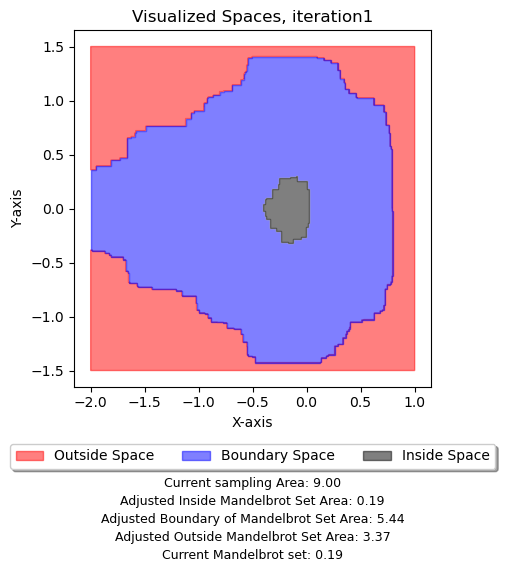

circle 2
beta = 15
part0代码运行时间: 0.453768253326416秒
part1代码运行时间: 0.2832486629486084秒
part2,adjust代码运行时间: 0.024404525756835938秒
Adjusted Inside Mandelbrot Set Area: 0.2973542443750843
Adjusted Boundary of Mandelbrot Set Area: 3.3360686002268194
Adjusted Outside Mandelbrot Set Area: 1.8036205507447132
Mandelbrot set 0.48897836316372173


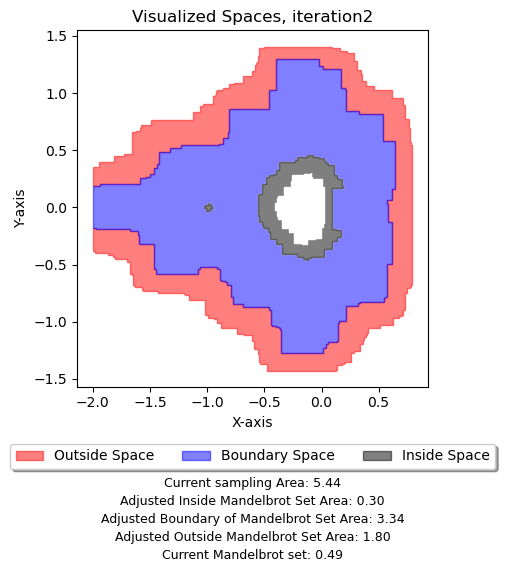

circle 3
beta = 16.5
part0代码运行时间: 0.5155243873596191秒
part1代码运行时间: 0.2852327823638916秒
part2,adjust代码运行时间: 0.07577300071716309秒
Adjusted Inside Mandelbrot Set Area: 0.3752330178225648
Adjusted Boundary of Mandelbrot Set Area: 2.0299833872843087
Adjusted Outside Mandelbrot Set Area: 0.9308521951199414
Mandelbrot set 0.8642113809862866


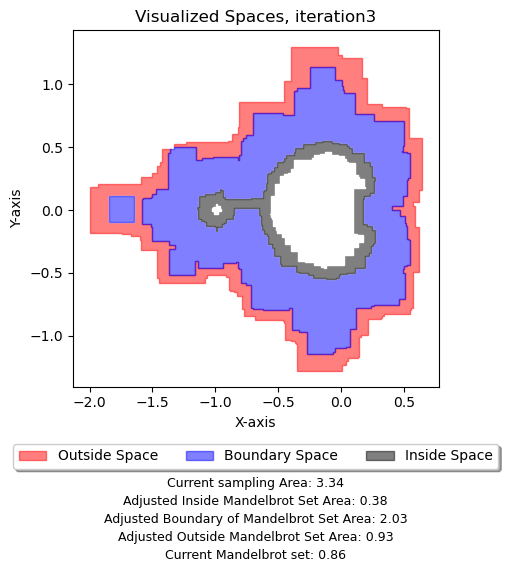

circle 4
beta = 18.150000000000002
part0代码运行时间: 0.6294729709625244秒
part1代码运行时间: 0.2661247253417969秒
part2,adjust代码运行时间: 0.04513287544250488秒
Adjusted Inside Mandelbrot Set Area: 0.2958925297627774
Adjusted Boundary of Mandelbrot Set Area: 1.1187699944087748
Adjusted Outside Mandelbrot Set Area: 0.6153208631127571
Mandelbrot set 1.160103910749064


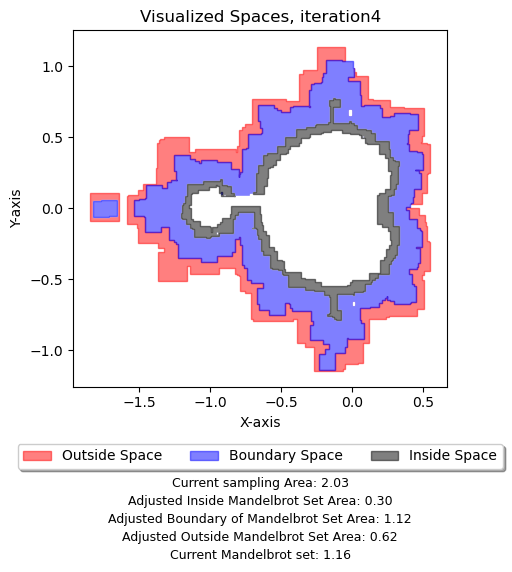

circle 5
beta = 16.335
part0代码运行时间: 0.748884916305542秒
part1代码运行时间: 0.3217291831970215秒
part2,adjust代码运行时间: 0.07152891159057617秒
Adjusted Inside Mandelbrot Set Area: 0.13988705260289175
Adjusted Boundary of Mandelbrot Set Area: 0.6284319376884705
Adjusted Outside Mandelbrot Set Area: 0.35045100411741276
Mandelbrot set 1.2999909633519557


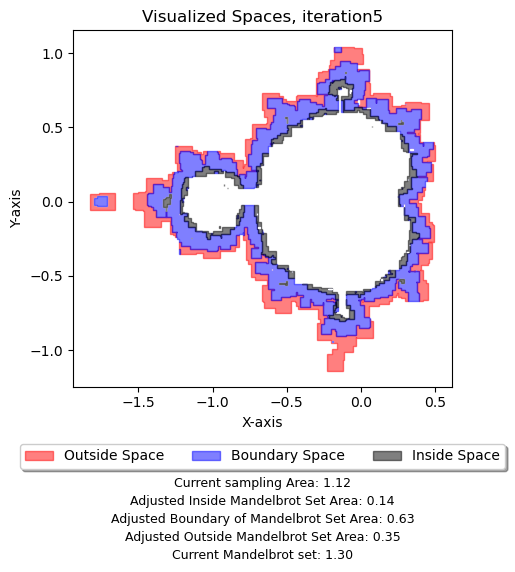

circle 6
beta = 14.701500000000001
part0代码运行时间: 0.8230993747711182秒
part1代码运行时间: 0.3715057373046875秒
part2,adjust代码运行时间: 0.14838147163391113秒
Adjusted Inside Mandelbrot Set Area: 0.09477440254181935
Adjusted Boundary of Mandelbrot Set Area: 0.3634037359428667
Adjusted Outside Mandelbrot Set Area: 0.17025379920378433
Mandelbrot set 1.394765365893775


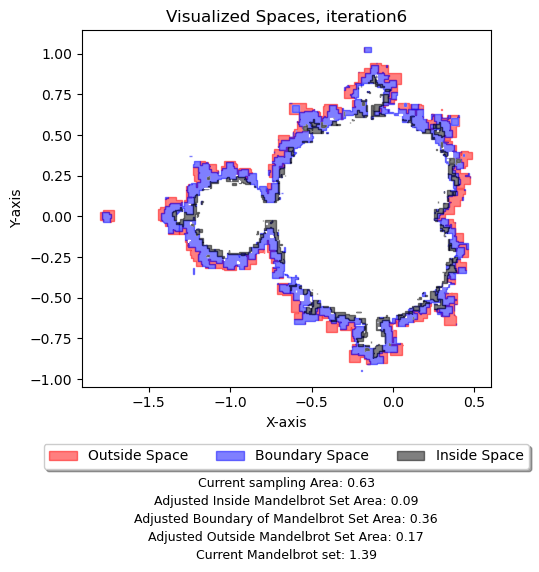

circle 7
beta = 13.23135
part0代码运行时间: 0.5864224433898926秒
part1代码运行时间: 0.33521461486816406秒
part2,adjust代码运行时间: 0.2507004737854004秒
Adjusted Inside Mandelbrot Set Area: 0.036186727018393705
Adjusted Boundary of Mandelbrot Set Area: 0.2373792498132502
Adjusted Outside Mandelbrot Set Area: 0.0898377591112221
Mandelbrot set 1.4309520929121688


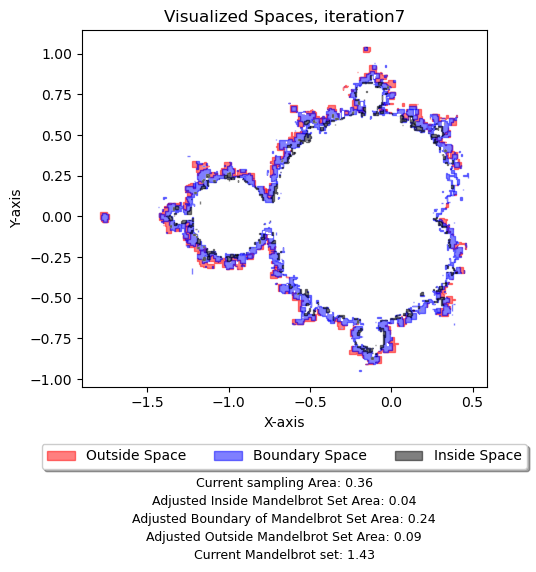

circle 8
beta = 14.554485000000001
part0代码运行时间: 0.41614532470703125秒
part1代码运行时间: 0.32392334938049316秒
part2,adjust代码运行时间: 0.317441463470459秒
Adjusted Inside Mandelbrot Set Area: 0.02007784248153732
Adjusted Boundary of Mandelbrot Set Area: 0.15923016733552722
Adjusted Outside Mandelbrot Set Area: 0.0580712399961856
Mandelbrot set 1.4510299353937062


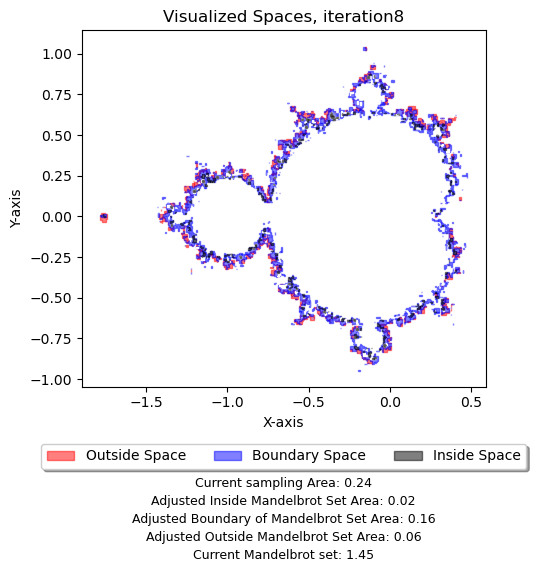

circle 9
beta = 16.009933500000002
part0代码运行时间: 0.41542983055114746秒
part1代码运行时间: 0.2416090965270996秒
part2,adjust代码运行时间: 0.21576642990112305秒
Adjusted Inside Mandelbrot Set Area: 0.005659692658124066
Adjusted Boundary of Mandelbrot Set Area: 0.13665323380698594
Adjusted Outside Mandelbrot Set Area: 0.01691724087041731
Mandelbrot set 1.4566896280518302


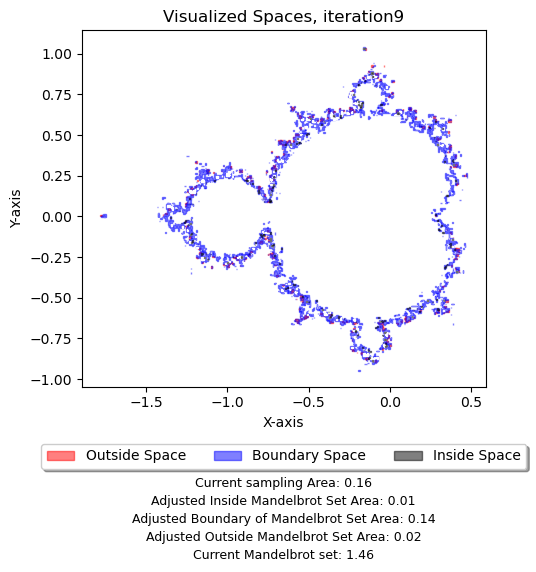

circle 10
beta = 17.610926850000006
part0代码运行时间: 0.4499959945678711秒
part1代码运行时间: 0.18976378440856934秒
part2,adjust代码运行时间: 0.126723051071167秒
Adjusted Inside Mandelbrot Set Area: 0.001481139461005268
Adjusted Boundary of Mandelbrot Set Area: 0.13038313285663136
Adjusted Outside Mandelbrot Set Area: 0.004788961489349085
Mandelbrot set 1.4581707675128355


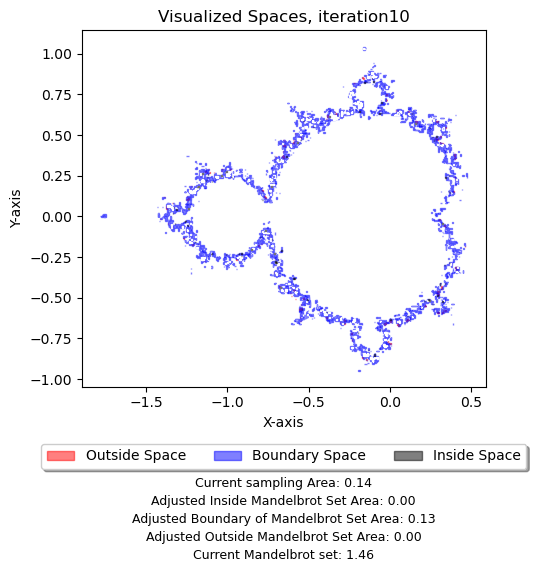

Mandelbrot set 1.5048218524489383


In [124]:
x_range = [-2, 1]
y_range = [-1.5, 1.5]
num_samples = 5000
max_iter = 2000
init_area_of_sample = (x_range[1] - x_range[0]) * (y_range[1] - y_range[0])
init_space = MultiPolygon([box(x_range[0], y_range[0], x_range[1], y_range[1])])


sampletime = 10
aim_samplesize = []
true_samplesize = []
inside = []
outside = []
boundary = []
beta = 15
last_sample = 1
unknowarea = 0
for i in range(sampletime):
    if i == 0:
        current_sample_space = init_space
        current_area_size = init_area_of_sample
    else:
        current_sample_space = adjusted_boundary_space
        current_area_size = adjusted_boundary_space.area

    aim_samplesize.append(current_sample_space)
    iteration_threshold = (i + 1) * 5
    print(f"circle {i+1}")

    if i > 1 : 
        if adjusted_inside_space.area / current_area_size <= 0.2:
            beta *= 1.1
        else:
            beta *= 0.9
    print(f"beta = {beta}")
    side_length = current_area_size / beta

    

    start_time = time.time() 
    #print(current_sample_space)
    inside_mandelbrot, boundary_points , outside_mandelbrot= random_sampling(current_sample_space, 
                                                    num_samples, max_iter, iteration_threshold)

    end_time = time.time()  # 结束时间
    elapsed_time = end_time - start_time  # 计算经过的时间

    print(f"part0代码运行时间: {elapsed_time}秒")


    """
    plt.figure(figsize=(10, 10))

    # Plot each set of points with different colors
    plt.scatter(inside_mandelbrot.real, inside_mandelbrot.imag, color='green', s=0.5, label='Inside Mandelbrot')
    plt.scatter(boundary_points.real, boundary_points.imag, color='blue', s=0.5, label='Boundary of Mandelbrot')
    plt.scatter(outside_mandelbrot.real, outside_mandelbrot.imag, color='red', s=0.5, label='Outside Mandelbrot')

    plt.xlim(x_range)
    plt.ylim(y_range)
    plt.title('Visualization of the Mandelbrot Set')
    plt.xlabel('Real part')
    plt.ylabel('Imaginary part')
    plt.legend()
    plt.show()
    
    """
    start_time = time.time() 

    inside_mandelbrot_squares = define_regions(inside_mandelbrot, side_length / 1.5)
    boundary_squares = define_regions(boundary_points, side_length)  # 0.1 is the length of the side of the square area
    outside_mandelbrot_squares = define_regions(outside_mandelbrot, side_length)

    def visualize_regions(squares, color):
        fig, ax = plt.subplots(figsize=(10, 10))

        # Draw each square
        for square in squares:
            left, right, bottom, top = square
            square_patch = plt.Rectangle((left, bottom), right - left, top - bottom, 
                                        edgecolor=color, facecolor='none')
            ax.add_patch(square_patch)

        ax.set_xlim(x_range)
        ax.set_ylim(y_range)
        plt.xlabel('Real part')
        plt.ylabel('Imaginary part')
        plt.title('Regions in the Mandelbrot Set')
        plt.show()

    # Visualize each set of regions
    #visualize_regions(inside_mandelbrot_squares, 'green')
    #visualize_regions(boundary_squares, 'blue')
    #visualize_regions(outside_mandelbrot_squares, 'red')

    #????????????
    inside_space = merge_squares(inside_mandelbrot_squares, current_sample_space)
    boundary_space = merge_squares(boundary_squares, current_sample_space)
    outside_space = merge_squares(outside_mandelbrot_squares, current_sample_space)
    
    #print(inside_space)
    #print(boundary_space)
    #print(current_sample_space)

    end_time = time.time()  # 结束时间
    elapsed_time = end_time - start_time  # 计算经过的时间

    print(f"part1代码运行时间: {elapsed_time}秒")


    start_time = time.time()  # 开始时间


    adjusted_inside_space, adjusted_boundary_space, adjusted_outside_space = adjust_spaces(inside_space,
                                                        boundary_space, outside_space, current_sample_space)
    
    
    end_time = time.time()  # 结束时间
    elapsed_time = end_time - start_time  # 计算经过的时间

    print(f"part2,adjust代码运行时间: {elapsed_time}秒")
    
    inside.append(adjusted_inside_space.area)
    boundary.append(adjusted_boundary_space.area)
    outside.append(adjusted_outside_space.area)
    
    print(f"Adjusted Inside Mandelbrot Set Area: {adjusted_inside_space.area}")
    print(f"Adjusted Boundary of Mandelbrot Set Area: {adjusted_boundary_space.area}")
    print(f"Adjusted Outside Mandelbrot Set Area: {adjusted_outside_space.area}")

    exact_sample_area = adjusted_inside_space.area + adjusted_boundary_space.area + adjusted_outside_space.area
    true_samplesize.append(exact_sample_area)
    print(f"Mandelbrot set {sum(inside)}")

    
    # Create a new plot with adjusted margins
    fig, ax = plt.subplots(figsize=(10, 6))  # You can adjust the figsize as needed

    # Visualize three areas with labels for the legend
    visualize_space(adjusted_outside_space, ax, color='red', label='Outside Space')    # Outer space in red
    visualize_space(adjusted_boundary_space, ax, color='blue', label='Boundary Space')  # Boundary space in blue
    visualize_space(adjusted_inside_space, ax, color='black', label='Inside Space')     # Inner space in black

    # Set the x and y boundaries of the image
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title(f"Visualized Spaces, iteration{i+1}")
    plt.gca().set_aspect('equal', adjustable='box')

    # Adjust the layout to provide space at the bottom
    fig.tight_layout(rect=[0, 0.2, 1, 0.95])  # Modify the bottom value to accommodate text

    # Place the legend at the bottom center with a custom bounding box
    legend = ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), shadow=True, ncol=3)

    # Adding area texts below the plot, above the legend placement
    add_area_text(fig, adjusted_inside_space.area + adjusted_boundary_space.area + adjusted_outside_space.area,
                "Current sampling Area", 0.13)
    add_area_text(fig, adjusted_inside_space.area, "Adjusted Inside Mandelbrot Set Area", 0.10)
    add_area_text(fig, adjusted_boundary_space.area, "Adjusted Boundary of Mandelbrot Set Area", 0.07)
    add_area_text(fig, adjusted_outside_space.area, "Adjusted Outside Mandelbrot Set Area", 0.04)
    add_area_text(fig, sum(inside), "Current Mandelbrot set", 0.01)

    # Display the plot
    plt.show()
    
    if adjusted_boundary_space.area <= 0.001:
        last_sample = 1
        break
    unknowarea = adjusted_boundary_space
if last_sample == 1:
    print(f"Mandelbrot set {sum(inside) + final_sampling(unknowarea, num_samples*10, max_iter, iteration_threshold)}")
else:
    print(f"Mandelbrot set {sum(inside)}")
